In [1]:
# standard libraries
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import os

# plotting libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# get the datetime library for date & time calcs
from datetime import datetime, timedelta

In [3]:
# get the new file

# load the the main data sets
wideData = os.path.normpath("C:/Users/n846490/Documents/Python Scripts/SurvivalAnalysis/keyProductsRollup.csv")
keyData = pd.read_csv(wideData)

In [4]:
keyData.head()

,Unnamed: 0,CustID,Customergroups,Channel,State,Closed,Auto,Cdira,Checking,Mortgage,Credit_Card,Investments,NumProducts
0,0,F10000,Boomers+,Branch,RI,1,0.0,0.0,1.0,0.0,0.0,0.0,3.0
1,1,F1000008,Boomers+,Branch,CT,1,0.0,1.0,1.0,0.0,0.0,0.0,3.0
2,2,F100001,Boomers+,Branch,PA,1,0.0,1.0,1.0,0.0,0.0,1.0,5.0
3,3,F1000013,Gen X,Branch,MA,1,0.0,0.0,1.0,1.0,1.0,0.0,6.0
4,4,F1000030,Boomers+,Branch,PA,1,0.0,0.0,1.0,1.0,0.0,0.0,4.0


In [7]:
keyClean = keyData.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12]]

keyClean.head()

,CustID,Customergroups,Channel,State,Closed,Auto,Cdira,Checking,Mortgage,Credit_Card,Investments,NumProducts
0,F10000,Boomers+,Branch,RI,1,0.0,0.0,1.0,0.0,0.0,0.0,3.0
1,F1000008,Boomers+,Branch,CT,1,0.0,1.0,1.0,0.0,0.0,0.0,3.0
2,F100001,Boomers+,Branch,PA,1,0.0,1.0,1.0,0.0,0.0,1.0,5.0
3,F1000013,Gen X,Branch,MA,1,0.0,0.0,1.0,1.0,1.0,0.0,6.0
4,F1000030,Boomers+,Branch,PA,1,0.0,0.0,1.0,1.0,0.0,0.0,4.0


In [23]:
keyClean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 911932 entries, 0 to 967907
Data columns (total 13 columns):
CustID            911932 non-null object
Customergroups    911932 non-null object
Channel           911932 non-null object
State             911932 non-null object
Closed            911932 non-null int64
Auto              911932 non-null float64
Cdira             911932 non-null float64
Checking          911932 non-null float64
Mortgage          911932 non-null float64
Credit_Card       911932 non-null float64
Investments       911932 non-null float64
NumProducts       911932 non-null float64
Footprint         911932 non-null object
dtypes: float64(7), int64(1), object(5)
memory usage: 97.4+ MB


In [8]:
# create a in footprint test
# create a condition to check

def footprint_col(colCheck):
    
    footprint = ['ME', 'VT', 'NH', 'MA', 'RI', 'CT', 'NY', 'NJ', 'PA']
    
    if colCheck in footprint:
        return('In')
    else:
        return('Out')


In [9]:
# now apply the function to create a new column called footprint

keyClean['Footprint'] = keyClean['State'].apply(footprint_col)

keyClean.head(20)

,CustID,Customergroups,Channel,State,Closed,Auto,Cdira,Checking,Mortgage,Credit_Card,Investments,NumProducts,Footprint
0,F10000,Boomers+,Branch,RI,1,0.0,0.0,1.0,0.0,0.0,0.0,3.0,In
1,F1000008,Boomers+,Branch,CT,1,0.0,1.0,1.0,0.0,0.0,0.0,3.0,In
2,F100001,Boomers+,Branch,PA,1,0.0,1.0,1.0,0.0,0.0,1.0,5.0,In
3,F1000013,Gen X,Branch,MA,1,0.0,0.0,1.0,1.0,1.0,0.0,6.0,In
4,F1000030,Boomers+,Branch,PA,1,0.0,0.0,1.0,1.0,0.0,0.0,4.0,In
5,F1000031,Boomers+,Branch,NH,1,0.0,1.0,1.0,1.0,0.0,1.0,9.0,In
6,F1000034,Boomers+,Branch,NH,1,0.0,0.0,1.0,0.0,1.0,0.0,5.0,In
7,F1000039,Boomers+,OnlinePhone,MA,1,0.0,0.0,1.0,0.0,0.0,0.0,3.0,In
8,F1000042,Gen X,Branch,MA,1,0.0,0.0,1.0,1.0,0.0,0.0,4.0,In
9,F100006,Boomers+,Branch,PA,1,0.0,0.0,1.0,0.0,1.0,1.0,6.0,In


In [10]:
keyClean.shape[0]

967908

In [11]:
# find the nulls that pose a problem to the filter

# keyData['State'].isnull().sum()
# there are 55901 NA in state

# nw drop the null in place

keyClean = keyClean[pd.notnull(keyClean['State'])]

In [12]:
keyClean.shape[0]

912007

In [13]:
# need to remove the state with *******
import re

# create the regex for the stars
patternDel = re.compile(r'^\*')

# then create the filter on the state column
filter = keyClean['State'].str.contains(patternDel)

# keep all items not in the filter
keyClean = keyClean[~filter]

In [14]:
keyClean.shape[0]

911932

In [16]:
# get the counts of the customers in and out of footprint

keyClean.groupby(['Channel', 'Footprint']).agg({'Footprint' : pd.Series.count}, {'Closed' : pd.Series.sum})

Footprint
Channel     Footprint           
Branch      In            815113
            Out            23614
OnlinePhone In             64005
            Out             9200

In [17]:
keyClean.groupby(['Channel', 'Footprint']).agg({'Closed' : pd.Series.sum})

Closed
Channel     Footprint        
Branch      In         514328
            Out         14207
OnlinePhone In          38312
            Out          5419

In [18]:
keyClean.groupby(['Channel', 'Footprint', 'State']).agg({'Footprint' : pd.Series.count})

Footprint
Channel     Footprint State           
Branch      In        CT         33681
                      MA        266593
                      ME           544
                      NH         19737
                      NJ        173228
                      NY        114761
                      PA        159330
                      RI         46985
                      VT           254
            Out       AA             1
                      AE             9
                      AK            25
                      AL           190
                      AP             3
                      AR           109
                      AZ           430
                      CA          1978
                      CO           338
                      DC           178
                      DE          2061
                      FL          5028
                      GA           769
                      GU             1
                      HI            66
                      IA            98
                      ID            42
                      IL           549
                      IN           262
                      KS           114
                      KY           182
...                                ...
OnlinePhone Out       IN           112
                      KS            63
                      KY            53
                      LA            75
                      MD           526
                      MI           218
                      MN           167
                      MO           144
                      MS            44
                      MT            22
                      NC           349
                      ND             8
                      NE            32
                      NM            27
                      NV            88
                      OH           308
                      OK            57
                      OR           130
                      PR            13
                      SC           139
                      SD             7
                      TN           115
                      TX           875
                      UT           104
                      VA           391
                      VI             4
                      WA           263
                      WI           130
                      WV            24
                      WY             8

[114 rows x 1 columns]

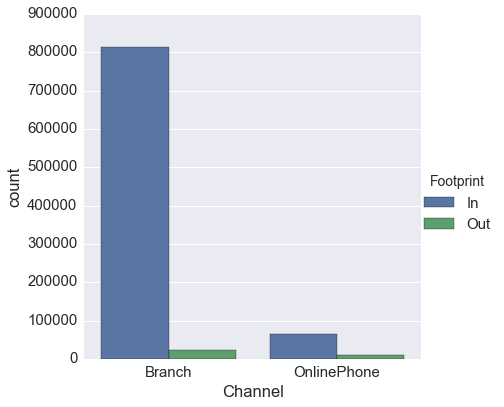

In [19]:
sns.set(font_scale=1.5)

sns.factorplot(x = 'Channel', data = keyClean, kind = 'count', legend = 'True', hue = 'Footprint', size = 6)

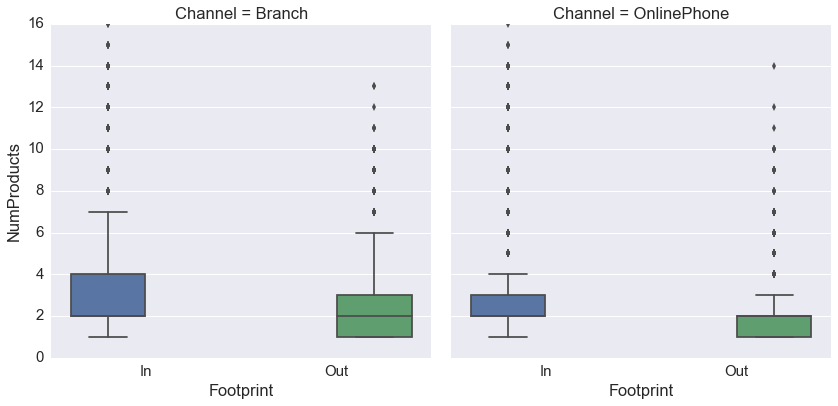

In [20]:
# sns.factorplot(x="time", y="total_bill", hue="smoker",
#               col="day", data=tips, kind="box", size=4, aspect=.5)

sns.factorplot( data = keyClean, x = 'Footprint', col = 'Channel', y = 'NumProducts', hue = 'Footprint', kind = 'box', size= 6)

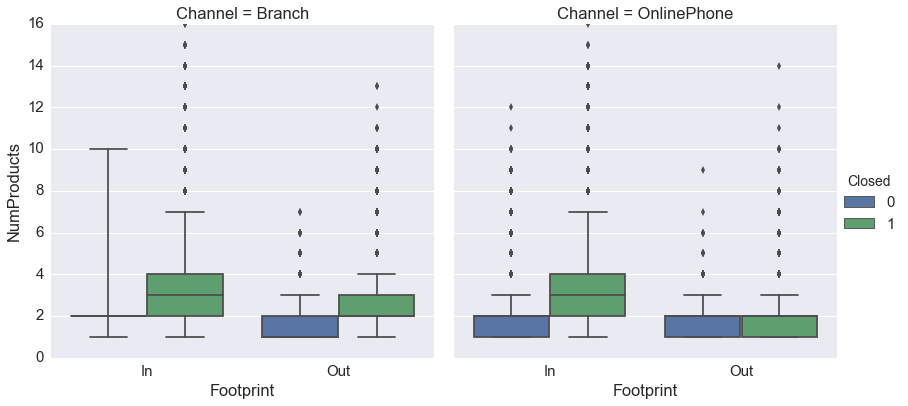

In [21]:

sns.factorplot( data = keyClean, x = 'Footprint', col = 'Channel', y = 'NumProducts', hue = 'Closed', kind = 'box', size= 6)



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57]), <a list of 58 Text xticklabel objects>)

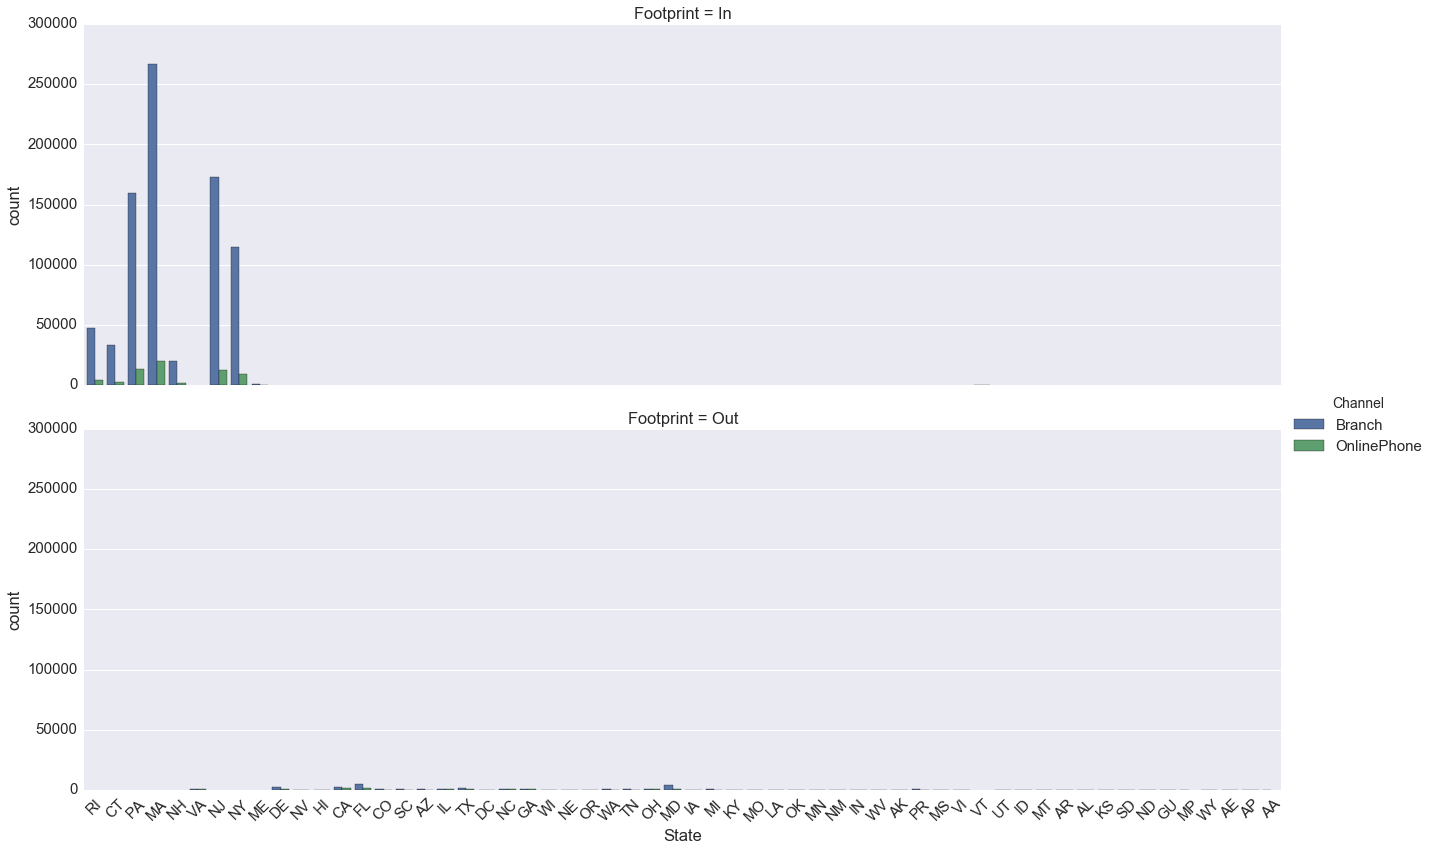

In [22]:
# expand the factorplot

sns.factorplot(data = keyClean, x = 'State', row = 'Footprint', kind = 'count', legend = 'True', hue = 'Channel', size = 6, aspect = 3)
plt.xticks(rotation=45)